## Visualize results of sweeping noise prior parameters

In [12]:
using Revise
using JLD
using MAT
using Statistics
using StatsPlots
using LaTeXStrings
using Plots
pyplot();

In [13]:
include("util.jl");

In [14]:
alpha = 0.1
linewidth = 2;
styles = [:solid, :dash, :dot, :dashdot];

### Load results

In [15]:
stde = 0.03
τ_true = 1/0.03^2;
prior_a = [1e-1 1e0 1e1 1e2 1e3]
prior_b = 1e-1
num_priors = length(prior_a);

In [16]:
# Training signal
T = 257

# Parameters
pol = 3
basis = 22

RMS_sim_FEM = zeros(num_priors,)
RMS_prd_FEM = zeros(num_priors,)
RMS_sim_RLS = zeros(num_priors,)
RMS_prd_RLS = zeros(num_priors,)
RMS_sim_ILS = zeros(num_priors,)
RMS_prd_ILS = zeros(num_priors,)

param_evo = zeros(T,num_priors)

for (i,a) in enumerate(prior_a)

    # Load
    results = load("results/sweep-noise-prior-a"*string(a)*"_b"*string(prior_b)*"_stde"*string(stde)*"_pol"*string(pol)*"_order4_N"*string(basis)*"_r1.jld")
    RMS_prd_FEM[i] = results["RMS_prd_FEM"]
    RMS_sim_FEM[i] = results["RMS_sim_FEM"]
    RMS_prd_RLS[i] = results["RMS_prd_RLS"]
    RMS_sim_RLS[i] = results["RMS_sim_RLS"]
    RMS_prd_ILS[i] = results["RMS_prd_ILS"]
    RMS_sim_ILS[i] = results["RMS_sim_ILS"]
    
    # Evolution of parameters
    params_τ = results["params_tau"]
    param_evo[:,i] = params_τ[1] ./ params_τ[2]

end    


### Plot RMS

In [17]:
prior_mτ = (prior_a./prior_b)';

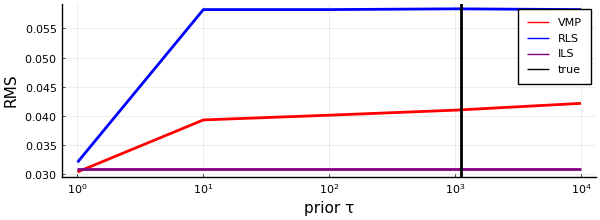

In [18]:
p100 = plot(prior_mτ,
            RMS_sim_FEM,
            color="red", 
            label="VMP", 
            xscale=:log10,
            linewidth=linewidth,
            fillalpha=alpha,
            xlabel="prior τ",
            ylabel="RMS",
            size=(600,220))
plot!(prior_mτ,
      RMS_sim_RLS,
      color="blue", 
      linewidth=linewidth,
      fillalpha=alpha,
      label="RLS")
plot!(prior_mτ,
      RMS_sim_ILS,
      color="purple", 
      linewidth=linewidth,
      fillalpha=alpha,
      label="ILS")
vline!([τ_true], linewidth=linewidth, color="black", label="true")

In [19]:
savefig(p100, "figures/sweep-noise-prior_RMS-sim.png")

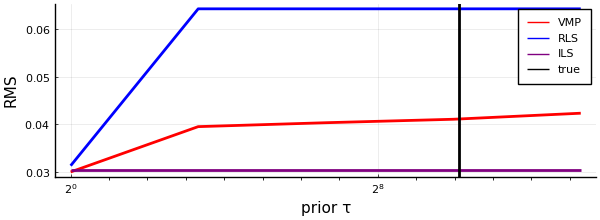

In [20]:
p200 = plot(prior_mτ,
          RMS_prd_FEM,
          color="red", 
          label="VMP", 
          xscale=:log2,
          linewidth=linewidth,
          fillalpha=alpha,
          xlabel="prior τ",
          ylabel="RMS",
          size=(600,220))
plot!(prior_mτ,
      RMS_prd_RLS,
      color="blue", 
      linewidth=linewidth,
      fillalpha=alpha,
      label="RLS")
plot!(prior_mτ,
      RMS_prd_ILS,
      color="purple", 
      linewidth=linewidth,
      fillalpha=alpha,
      label="ILS")
vline!([τ_true], linewidth=linewidth, color="black", label="true")

In [21]:
savefig(p200, "figures/sweep-noise-prior_RMS-prd.png")

### Plot parameter evolution

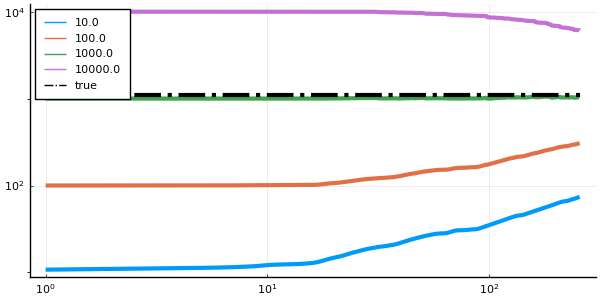

In [22]:
index = 2:5
plot(param_evo[:,index], 
     labels=prior_mτ[index]',
     xscale=:log10,
     yscale=:log10,
     legend=:topleft,
     linewidth=3,
     size=(600,300))
plot!(τ_true*ones(T,), linewidth=3, linestyle=:dashdot, color="black", label="true")